In [187]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [188]:
def partial_derivative(g, Y, i, epsilon = 1e-6):
    # del g/del yi
    g1 = g(Y)
    Y[i] += epsilon
    g2 = g(Y)
    return (g2 - g1) / epsilon

def trapezoidal_rule(Y, x_n, Y_n, h):
    return Y_n + h / 2 * (f(x_n + h, Y) + f(x_n, Y_n)) - Y

def newton_raphson(Y_n, x_n, h, iterations = 10000, tolerance = 1e-6):
    Y_k = Y_n + h*f(x_n, Y_n)
    J_k = np.zeros((N, N))
    # J_k
    # J_k[i, j] = del Fi / del yj
    error = 1
    # print("starting Newton Rapson")
    while iterations and error > tolerance:
        for i in range(N):
            for j in range(N):
                def Fi(Y_):
                    return trapezoidal_rule(Y_, x_n, Y_n, h)[i]
                J_k[i, j] = partial_derivative(Fi, Y_k, j)
        # print(" J = \n",J_k)
        # print(" y* => ",Y_k)
        Y_k = Y_k - np.linalg.inv(J_k) @ trapezoidal_rule(Y_k, x_n, Y_n, h)
        iterations -= 1
        error = np.linalg.norm(trapezoidal_rule(Y_k, x_n, Y_n, h))
    return Y_k

In [189]:
def equation_solver(x0, x1, num_points, Y0, N):
    h = (x1 - x0) / num_points
    Y_n = Y0
    x_n = x0
    '''
    Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
    '''
    output = np.zeros((N, num_points + 1))
    for i in range(N):
        output[i][0] = Y_n[i]
    
    # print(Y_n)
    for n in range(1, num_points + 1):
        '''
        Y_(n + 1) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n))
        Now we have to solve Y_(n + 1) [vector of size Nx1]
        Newton-Rapson
        F(Y_(n + 1)) = Y_(n) + h/2*(f(x_n + h, Y_(n + 1)) + f(x_n, Y_n)) - Y_(n + 1) 
        Find Y_(n + 1) = [y1, y2, ..., yN] s.t
        F(Y_(n + 1)) = 0
        '''
        # print("Y = ",Y_n)
        Y_n = newton_raphson(Y_n, x_n, h)
        x_n += h
        for i in range(N):
            output[i][n] = Y_n[i]

    return output


In [181]:
# '''
# Functions 
# '''
# def function_1(x, Y):
#     return  -2 * Y[0] + Y[1] - 2 * Y[2]

# def function_2(x, Y):
#     return Y[0] - 2 * Y[1] + 2 * Y[2]

# def function_3(x, Y):
#     return 3 * Y[0] - 3 * Y[1] + 5 * Y[2]

# def f(x, Y):
#     return np.array([function_1(x, Y), function_2(x, Y), function_3(x, Y)])

# N = 3  # Number of Functions

# x0, x1 = 0, 1
# Y0 = np.array([-2, 2, 4])

In [182]:
# num_points = 10000
# x_array = np.linspace(x0, x1, num_points + 1)
# y_array = equation_solver(x0, x1, num_points, Y0, N)
# plt.figure(figsize=(8, 6))
# for i in range(N):
#     plt.plot(x_array, y_array[i], label=f'y_{i + 1}')
# plt.xlabel('x')
# plt.legend()
# plt.grid(True)
# plt.savefig('Report\\save.png')
# plt.show()

WEEK 5  
a y'' + b y' + c y = g(x)

consider the below substitution  
y1 = y  
y2 = y'    

a y2' + b y2 + c y1 = g(x)

Now the system of equations are   
y1' = y2  
y2' = -b/a y2 - c/a y1 + g(t)/a    

In [183]:
a = 1
b = 1
c = 1

def g(x, A = 1, f_ = 1, c_ = np.pi):
    # A sin(2*pi*f_ + c_)
    return A * np.sin(2*np.pi*f_*x + c_)

def function_1(x, Y):
    return  Y[1]
def function_2(x, Y):
    return -b/a * Y[1] - c/a * Y[0] + g(x)/a

def f(x, Y):
    return np.array([function_1(x, Y), function_2(x, Y)])

N = 2  # Number of Functions

x0, x1 = 0, 20
Y0 = np.array([0, 0])



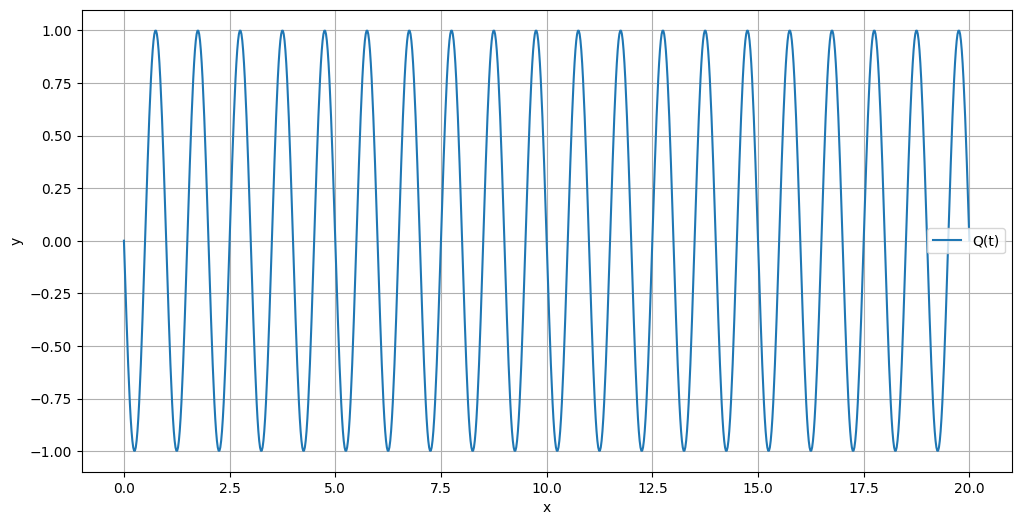

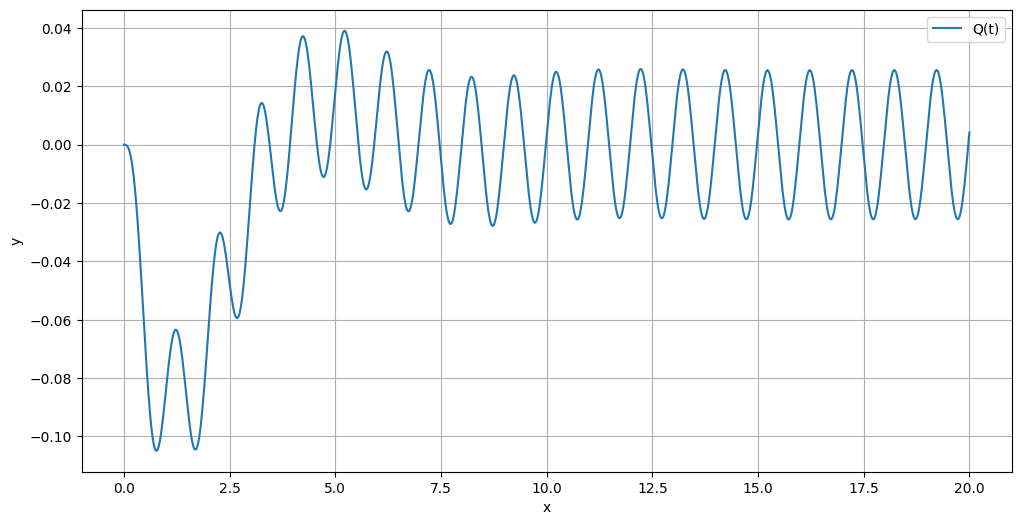

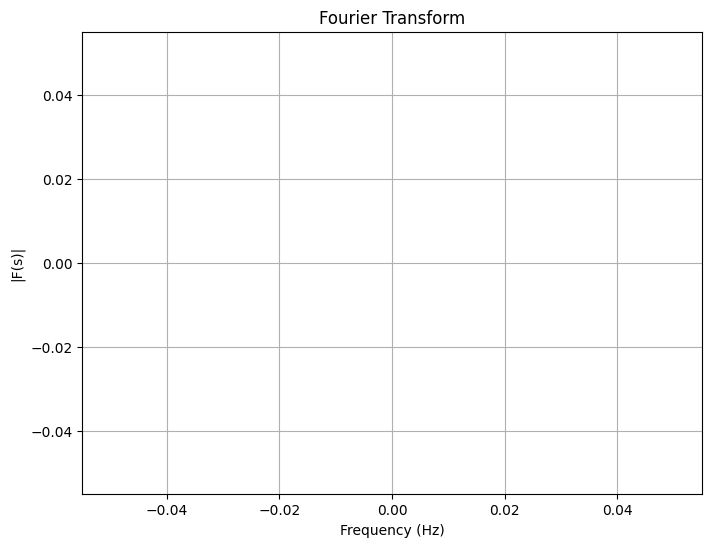

In [184]:

num_points = 1000
x_array = np.linspace(x0, x1, num_points + 1)
y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(x_array, list(map(g,x_array)), label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_0.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_array, y_array[0], label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_1.png')
plt.show()

# X_k = np.fft.fft(y_array)

# # Optionally, compute the frequencies corresponding to the DFT coefficients
# N = len(y_array)  # Length of the signal
# sampling_rate = 50  # Sampling rate (samples per second)
# frequencies = np.fft.fftfreq(N, d=1/sampling_rate)

# # Plot the magnitude spectrum
# plt.figure(figsize=(10, 5))
# plt.plot(frequencies, np.abs(X_k))
# plt.title('DFT Magnitude Spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude')
# plt.grid(True)
# plt.show()

def dft(t, ft):
    N = len(ft)
    s = np.fft.fftfreq(N, t[1] - t[0])  # Frequency values
    F_s = np.fft.fft(ft)                # DFT of f(t)
    return s, F_s

def plot_F_vs_s(s, F_s):
    plt.figure(figsize=(8, 6))
    plt.plot(s, np.abs(F_s), 'b-')  # Plot magnitude of F(s)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('|F(s)|')
    plt.title('Fourier Transform')
    plt.grid(True)
    plt.show()

# Example usage:
t = x_array[700:]  # Time array
f_t = y_array[700:]

s, F_s = dft(t, f_t)
plot_F_vs_s(s, F_s)

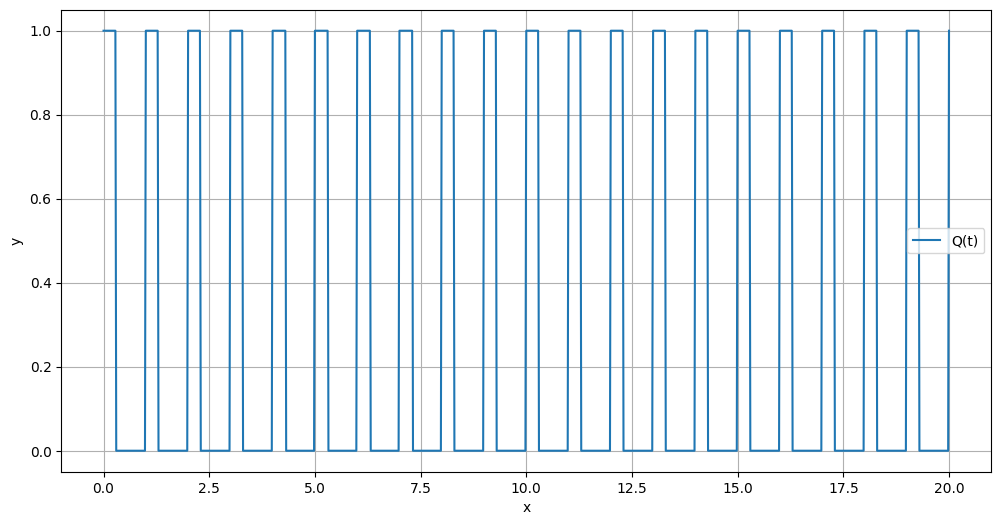

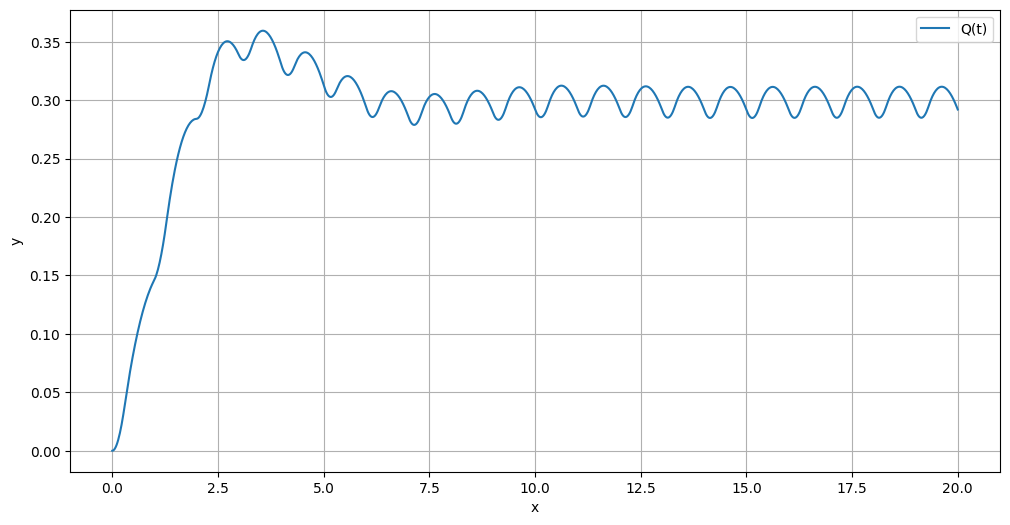

In [185]:
def g(x, t1 = 0.3):
    x = x - np.floor(x)
    if(x < t1):
        return 1
    return 0

y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(x_array, list(map(g,x_array)), label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_2.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_array, y_array[0], label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_3.png')
plt.show()

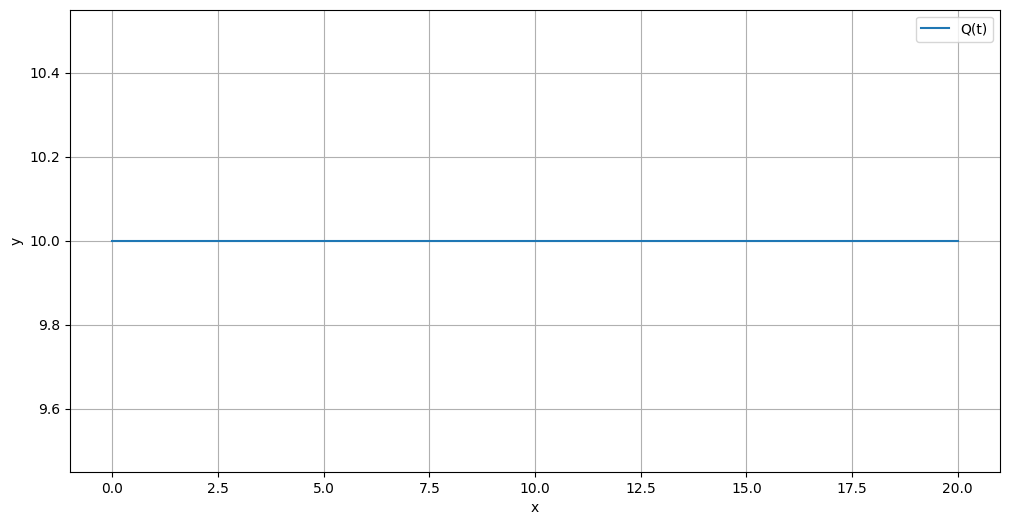

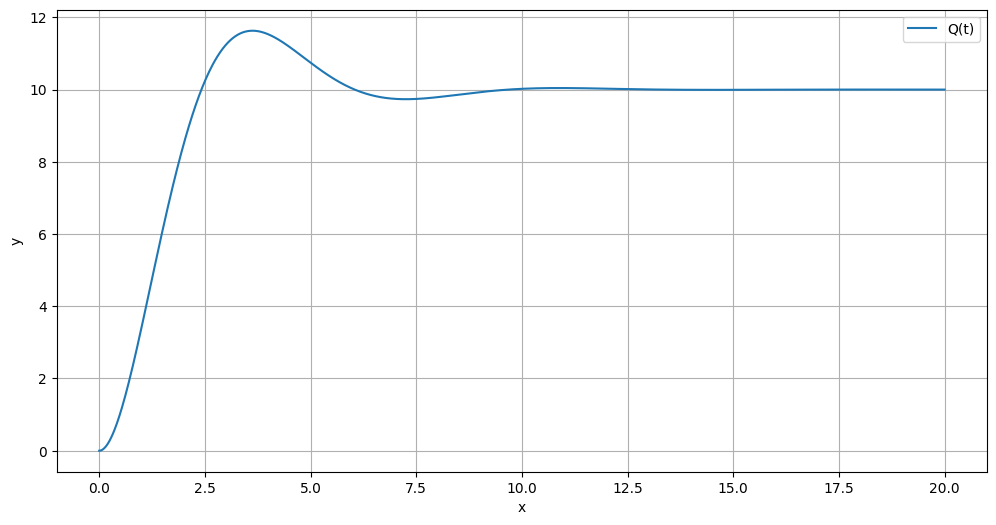

In [186]:
def g(x, c_ = 10):
    return c_

y_array = equation_solver(x0, x1, num_points, Y0, N)

plt.figure(figsize=(12, 6))
plt.plot(x_array, list(map(g,x_array)), label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_4.png')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_array, y_array[0], label=f'Q(t)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.savefig('Report\\save_5.png')
plt.show()